## First part

In [49]:
# all imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [3]:
# load data
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [4]:
# prepare test and prain data
train_x = train_x.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_x = test_x.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [35]:
# create Convolutional Neural Network, CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y))


Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4815 - accuracy: 0.8236 - val_loss: 0.3703 - val_accuracy: 0.8652
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3138 - accuracy: 0.8863 - val_loss: 0.3153 - val_accuracy: 0.8848
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2674 - accuracy: 0.9016 - val_loss: 0.2876 - val_accuracy: 0.8962
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2397 - accuracy: 0.9113 - val_loss: 0.2697 - val_accuracy: 0.9021
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2147 - accuracy: 0.9211 - val_loss: 0.2537 - val_accuracy: 0.9102
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1974 - accuracy: 0.9265 - val_loss: 0.2649 - val_accuracy: 0.9089
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1790 - accuracy: 0.9338 - val_loss: 0.2673 - val_ac

In [37]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print("Test Accuracy:", test_acc)
print("Test loss: ", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.2951 - accuracy: 0.9103
Test Accuracy: 0.9103000164031982
Test loss:  0.29511043429374695


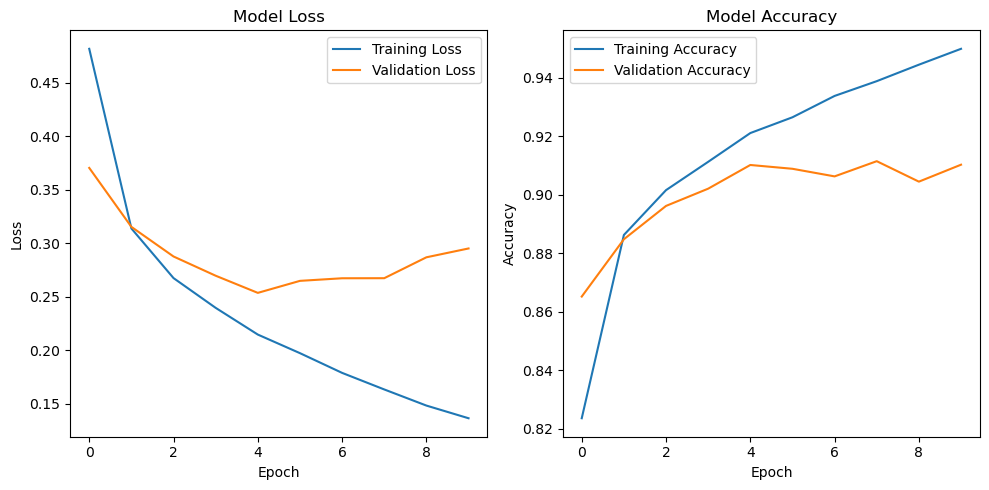

In [36]:
# visualize graphics for loss/accuracy for model

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
# creation of model2
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="sigmoid")
])

model2.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)


In [31]:
history2 = model2.fit(train_x, train_y, epochs=30, validation_data=(test_x, test_y))

Epoch 1/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0684 - accuracy: 0.8745 - val_loss: 0.0848 - val_accuracy: 0.8592
Epoch 2/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0686 - accuracy: 0.8752 - val_loss: 0.0982 - val_accuracy: 0.8629
Epoch 3/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0681 - accuracy: 0.8752 - val_loss: 0.0795 - val_accuracy: 0.8531
Epoch 4/30
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0693 - accuracy: 0.8728 - val_loss: 0.0771 - val_accuracy: 0.8572
Epoch 5/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0712 - accuracy: 0.8723 - val_loss: 0.0727 - val_accuracy: 0.8714
Epoch 6/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0684 - accuracy: 0.8747 - val_loss: 0.1035 - val_accuracy: 0.8490
Epoch 7/30
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0704 - accuracy: 0.8736 - val_loss: 0.0832 -

In [23]:
test_loss2, test_acc2 = model2.evaluate(test_x, test_y)
print("Test Accuracy 2:", test_acc2)
print("Test loss 2: ", test_loss2)

313/313 [==============================] - 1s 4ms/step - loss: 0.0712 - accuracy: 0.8687
Test Accuracy 2: 0.8687000274658203
Test loss 2:  0.07116839289665222


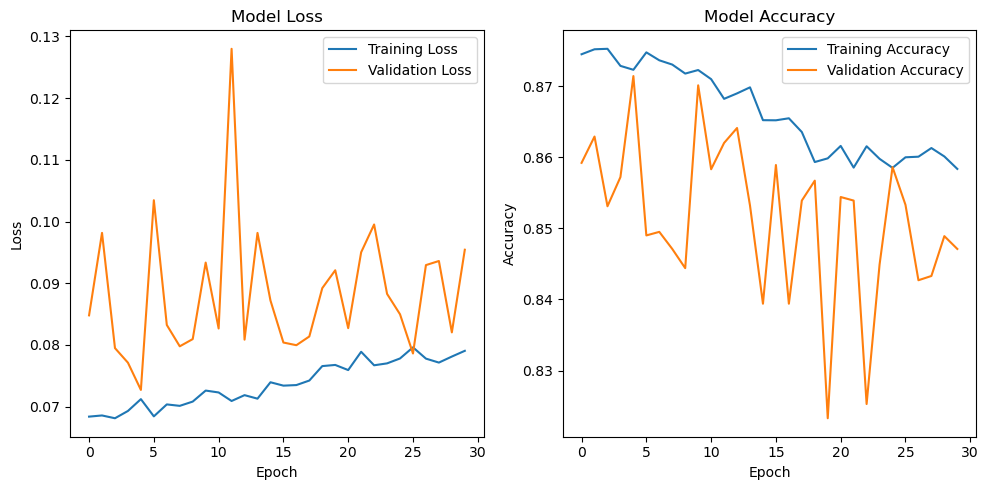

In [38]:
# visualize graphics for loss/accuracy for model2

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Second part

In [58]:
# load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
     
# data normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
     
# Change the data dimension for VGG16
x_train = np.stack([x_train]*3, axis=-1)
x_test = np.stack([x_test]*3, axis=-1)
     
# Convert labels to categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
     
resized_x_train = tf.image.resize(x_train, (32,32))
resized_x_test = tf.image.resize(x_test, (32,32))

resized_x_train.shape, x_train.shape
     

(TensorShape([60000, 32, 32, 3]), (60000, 28, 28, 3))

In [56]:
# Build VGG16 model
base_model = VGG16(
        include_top=False,
        weights='imagenet',
        input_shape=(32, 32, 3),
        pooling='avg'
    )

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [59]:
# Compilation
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Model training
history = model.fit(
        resized_x_train, y_train,
        epochs=15,
        batch_size=200,
        validation_split=0.2) 

Epoch 1/15
240/240 [==============================] - 518s 2s/step - loss: 2.2808 - accuracy: 0.1482 - val_loss: 1.2741 - val_accuracy: 0.4566
Epoch 2/15
240/240 [==============================] - 539s 2s/step - loss: 0.8910 - accuracy: 0.6392 - val_loss: 0.6219 - val_accuracy: 0.7393
Epoch 3/15
240/240 [==============================] - 612s 3s/step - loss: 0.5778 - accuracy: 0.7616 - val_loss: 0.4535 - val_accuracy: 0.8142
Epoch 4/15
240/240 [==============================] - 3460s 14s/step - loss: 0.4319 - accuracy: 0.8472 - val_loss: 0.3723 - val_accuracy: 0.8727
Epoch 5/15
240/240 [==============================] - 996s 4s/step - loss: 0.3424 - accuracy: 0.8882 - val_loss: 0.3248 - val_accuracy: 0.8879
Epoch 6/15
240/240 [==============================] - 898s 4s/step - loss: 0.2791 - accuracy: 0.9086 - val_loss: 0.2838 - val_accuracy: 0.8973
Epoch 7/15
240/240 [==============================] - 952s 4s/step - loss: 0.2499 - accuracy: 0.9179 - val_loss: 0.2500 - val_accuracy: 0.91

In [63]:
test_loss3, test_acc3 = model.evaluate(resized_x_test, y_test)
print("Test Accuracy 3:", test_acc3)
print("Test loss 3: ", test_loss3)

313/313 [==============================] - 42s 132ms/step - loss: 0.2722 - accuracy: 0.9231
Test Accuracy 3: 0.9230999946594238
Test loss 3:  0.27217742800712585


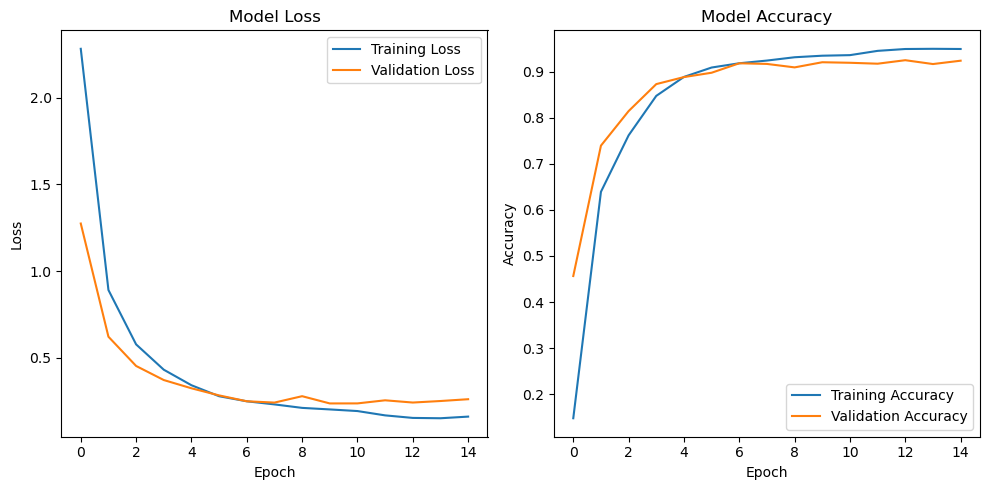

In [62]:
# visualize graphics for loss/accuracy for model2

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion: 

### First task

Comparing the accuracy of the obtained convolutional neural network and the multilayer neural network from the previous task, the following conclusions can be drawn:

**Model Accuracy:**
* The convolutional network achieved an accuracy of 0.9103, while the multilayer network reached an accuracy of 0.912(on test data).


**Architecture Efficiency:**
* The convolutional network demonstrated a bit lower accuracy compared to the multilayer network.

**Speed Performance:**
* In terms of training and inference time, it can be noted that the these models have almost the similar speed, which can be an important factor when applying the model in real-world conditions.


**Overall Conclusions:**
* Based on the comparative analysis of accuracy, efficiency, and speed performance of the models, it can be concluded that multilayer network is quite better. This information can be valuable for further improvement or selection of the most suitable model under specific application conditions.

### Second task (VGG16)

**Model Accuracy:**
* The convolutional network achieved an accuracy of 0.923, while the multilayer network reached an accuracy of 0.91 (on test data).


**Architecture Efficiency:**
* The convolutional network demonstrated bigger accuracy compared to the multilayer network.

**Speed Performance:**
* In terms of training and inference time, it can be noted that the convolutional model was more slower than miltilayer model, which can be an important factor when applying the model in real-world conditions.


**Overall Conclusions:**
* Based on the comparative analysis of accuracy, efficiency, and speed performance of the models, it can be concluded that convolutional network is quite better. This information can be valuable for further improvement or selection of the most suitable model under specific application conditions.